In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.callbacks import EarlyStopping
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras import regularizers

Using TensorFlow backend.


In [3]:
from keras.datasets import cifar10
(X_train, y_train), (X_val, y_val) = cifar10.load_data()

170500096/170498071 [==============================] - 64s 0us/step


In [0]:
X_train = X_train.astype('float32')/255.
X_val = X_val.astype('float32')/255.

In [0]:
n_classes = 10
y_train = np_utils.to_categorical(y_train, n_classes)
y_val = np_utils.to_categorical(y_val, n_classes)

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


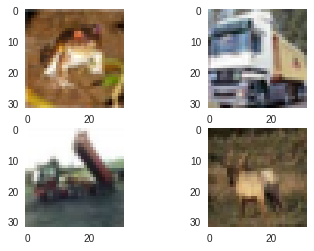

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(221)
plt.imshow(X_train[0].reshape(32,32,3), cmap=plt.get_cmap('gray'))
plt.grid('off')
plt.subplot(222)
plt.imshow(X_train[1].reshape(32,32,3), cmap=plt.get_cmap('gray'))
plt.grid('off')
plt.subplot(223)
plt.imshow(X_train[2].reshape(32,32,3), cmap=plt.get_cmap('gray'))
plt.grid('off')
plt.subplot(224)
plt.imshow(X_train[3].reshape(32,32,3), cmap=plt.get_cmap('gray'))
plt.grid('off')
plt.show()

In [0]:
input_shape = X_train[0].shape

In [0]:
weight_decay = 1e-4

In [0]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [0]:
from keras.optimizers import Adam
adam = Adam(lr = 0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam,metrics=['accuracy'])

In [20]:
history = model.fit(X_train, y_train, batch_size=32,epochs=10, verbose=1, validation_data=(X_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 103s 2ms/step - loss: 2.4452 - acc: 0.3517 - val_loss: 1.8186 - val_acc: 0.4763
Epoch 2/10
50000/50000 [==============================] - 86s 2ms/step - loss: 1.7781 - acc: 0.4717 - val_loss: 1.5024 - val_acc: 0.5633
Epoch 3/10
50000/50000 [==============================] - 91s 2ms/step - loss: 1.5005 - acc: 0.5686 - val_loss: 1.5932 - val_acc: 0.5605
Epoch 4/10
50000/50000 [==============================] - 86s 2ms/step - loss: 1.4385 - acc: 0.6089 - val_loss: 1.4194 - val_acc: 0.6128
Epoch 5/10
50000/50000 [==============================] - 83s 2ms/step - loss: 1.4114 - acc: 0.6174 - val_loss: 1.3345 - val_acc: 0.6393
Epoch 6/10
50000/50000 [==============================] - 84s 2ms/step - loss: 1.3523 - acc: 0.6291 - val_loss: 1.2478 - val_acc: 0.6704
Epoch 7/10
50000/50000 [==============================] - 84s 2ms/step - loss: 1.3267 - acc: 0.6386 - val_loss: 1.2767 - val_ac

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


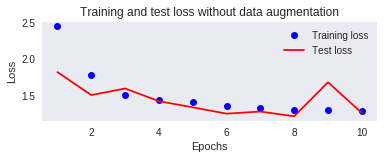

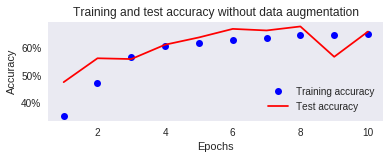

In [22]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(val_loss_values) + 1)

import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Test loss')
plt.title('Training and test loss without data augmentation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['acc'], 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Test accuracy')
plt.title('Training and test accuracy without data augmentation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

# Data augmentation

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )

In [0]:
datagen.fit(X_train)

In [0]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=X_train.shape[1:]))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [0]:
from keras.optimizers import Adam
adam = Adam(lr = 0.01)
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [0]:
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),steps_per_epoch=X_train.shape[0] // batch_size, epochs=10,validation_data=(X_val,y_val))

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(val_loss_values) + 1)

import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Test loss')
plt.title('Training and test loss with data augmentation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['acc'], 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Test accuracy')
plt.title('Training and test accuracy with data augmentation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()